In [1]:
from main import *

c = Circuit()
dc = DCVoltage(c, voltage=2)
r1 = Resistor(c, resistance=100)
r2 = Resistor(c, resistance=10)
r3 = Resistor(c, resistance=50)

ground(dc.neg, r2, r3)
connect(dc.pos, r1)
div = connect(r1, r2, r3)

In [2]:
c.compute_operating_point()
print(div.voltage)

Ignoring type i
0.15384615384615383


In [3]:
c.compute_dc_sweep((dc, 0, 1, 0.5))
print(div.voltage)

Ignoring node v-sweep [0.  0.5 1. ]
Ignoring type i
[0.         0.03846154 0.07692308]


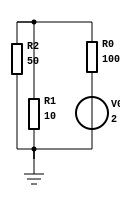

In [4]:
from IPython.display import SVG
SVG(c.render_svg())